In [219]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import math

In [238]:
bets = pd.DataFrame(pd.read_csv("bets/bets.csv"))
booking = pd.DataFrame(pd.read_csv("booking/booking.csv"))
goals = pd.DataFrame(pd.read_csv("goals/goals.csv"))
matches = pd.DataFrame(pd.read_csv("matches/matches.csv"))
stats = pd.DataFrame(pd.read_csv("stats/stats.csv"))

In [50]:
home_mean_score = matches.match_hometeam_score.mean()
away_mean_score = matches.match_awayteam_score.mean()
score_difference_mean = home_mean_score - away_mean_score

(array([ 977., 1665., 1363.,  687.,  257.,   98.,   20.,    7.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5]),
 <a list of 8 Patch objects>)

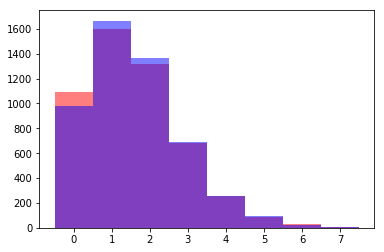

In [49]:
plt.hist(matches.match_hometeam_score.dropna().astype('int'), bins = [i-0.5 for i in range(0,9)], fc = (1,0,0,0.5))
plt.hist(np.random.poisson(home_mean_score, 5074), bins = [i-0.5 for i in range(0,9)], fc = (0,0,1,0.5))

(array([1462., 1854., 1108.,  474.,  131.,   35.,    8.,    2.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5]),
 <a list of 8 Patch objects>)

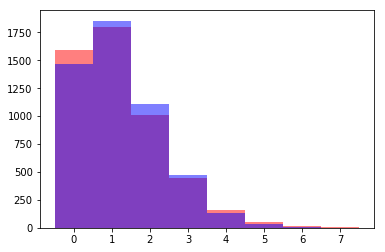

In [48]:
pyplot.hist(matches.match_awayteam_score.dropna().astype('int'), bins = [i-0.5 for i in range(0,9)], fc = (1,0,0,0.5))
plt.hist(np.random.poisson(away_mean_score, 5074), bins = [i-0.5 for i in range(0,9)], fc = (0,0,1,0.5))

Both samples seem like they fit to poisson distribution with their means

In [169]:
bets_chosen = bets[bets.odd_bookmakers.isin(['1xBet','18bet','Marathonbet','bet365'])]

In [170]:
bets_chosen["prob"] = 1 /bets_chosen.value
bets_chosen = bets_chosen[bets_chosen.variable.isin(['odd_1','odd_x','odd_2'])]

C:\Users\cagatay.karabulut\AppData\Local\Continuum\anaconda3.1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [177]:
bet_sum_dict = {}
for index, item in bets_chosen.iterrows():
    if (item.match_id, item.odd_bookmakers) in bet_sum_dict.keys():
        bet_sum_dict[(item.match_id, item.odd_bookmakers)] += item.prob
    else:
        bet_sum_dict[(item.match_id, item.odd_bookmakers)] = item.prob
prob_list = []
for index, item in bets_chosen.iterrows():
    prob_list.append(item.prob / bet_sum_dict[(item.match_id, item.odd_bookmakers)])
bets_chosen["new_prob"] = prob_list    


In [236]:
bets_chosen_draw = bets_chosen[bets_chosen.variable == 'odd_x'].sort_values(['match_id', 'odd_bookmakers'])
bets_chosen_home = bets_chosen[bets_chosen.variable == 'odd_1']
bets_chosen_away = bets_chosen[bets_chosen.variable == 'odd_2']
join_homeaway = bets_chosen_home.set_index(['match_id','odd_bookmakers']).join(bets_chosen_away.set_index(['match_id','odd_bookmakers']), lsuffix = '_n')

In [191]:
bets_chosen_difference = [i-j for i,j in zip(list(bets_chosen_home.sort_values(['match_id', 'odd_bookmakers']).new_prob) ,list(bets_chosen_away.sort_values(['match_id', 'odd_bookmakers']).new_prob))]

In [256]:
join_homeaway_match = join_homeaway.join(matches.set_index('match_id')[['match_hometeam_score','match_awayteam_score']], on='match_id', how='left')

In [264]:
join_homeaway_match['is_draw'] = list(join_homeaway_match.match_hometeam_score == join_homeaway_match.match_awayteam_score)

In [260]:
join_homeaway_match['prob_diff'] = join_homeaway_match.new_prob_n - join_homeaway_match.new_prob

In [365]:
join_18bet = join_homeaway_match[join_homeaway_match.index.get_level_values('odd_bookmakers') == '18bet']
join_1xbet = join_homeaway_match[join_homeaway_match.index.get_level_values('odd_bookmakers') == '1xBet']
join_Marathonbet = join_homeaway_match[join_homeaway_match.index.get_level_values('odd_bookmakers') == 'Marathonbet']
join_bet365 = join_homeaway_match[join_homeaway_match.index.get_level_values('odd_bookmakers') == 'bet365']

Text(0.5,1,'18Bet')

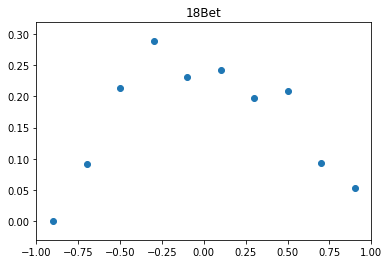

In [373]:
hist_list = []
for i in range(10):
    in_the_bin_prob = join_18bet[(join_18bet['prob_diff'] > i*0.2-1) & (join_18bet['prob_diff'] < i*0.2-0.8)]["prob_diff"].count()
    in_the_bin_real = join_18bet[(join_18bet['prob_diff'] > i*0.2-1) & (join_18bet['prob_diff'] < i*0.2-0.8) & (join_18bet['is_draw'] == True)]["prob_diff"].count()
    hist_list.append((in_the_bin_prob, in_the_bin_real))
probabilities = [(j/(i+1)) for (i,j) in hist_list]
plt.scatter([(i/5-0.9) for i in range(10)], probabilities)
plt.title('18Bet')

Text(0.5,1,'1XBet')

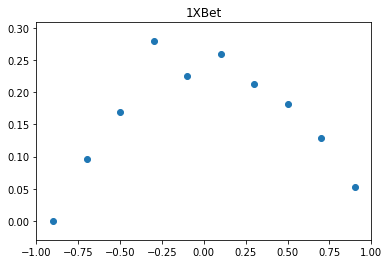

In [372]:
hist_list = []
for i in range(10):
    in_the_bin_prob = join_1xbet[(join_1xbet['prob_diff'] > i*0.2-1) & (join_1xbet['prob_diff'] < i*0.2-0.8)]["prob_diff"].count()
    in_the_bin_real = join_1xbet[(join_1xbet['prob_diff'] > i*0.2-1) & (join_1xbet['prob_diff'] < i*0.2-0.8) & (join_1xbet['is_draw'] == True)]["prob_diff"].count()
    hist_list.append((in_the_bin_prob, in_the_bin_real))
probabilities = [(j/(i+1)) for (i,j) in hist_list]
plt.scatter([(i/5-0.9) for i in range(10)], probabilities)
plt.title('1XBet')

Text(0.5,1,'Marathonbet')

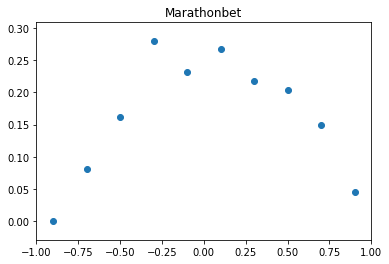

In [371]:
hist_list = []
for i in range(10):
    in_the_bin_prob = join_Marathonbet[(join_Marathonbet['prob_diff'] > i*0.2-1) & (join_Marathonbet['prob_diff'] < i*0.2-0.8)]["prob_diff"].count()
    in_the_bin_real = join_Marathonbet[(join_Marathonbet['prob_diff'] > i*0.2-1) & (join_Marathonbet['prob_diff'] < i*0.2-0.8) & join_Marathonbet['is_draw'] == True]["prob_diff"].count()
    hist_list.append((in_the_bin_prob, in_the_bin_real))
probabilities = [j/(i+1) for (i,j) in hist_list]
plt.scatter([(i/5-0.9) for i in range(10)], probabilities)
plt.title('Marathonbet')

Text(0.5,1,'Bet365')

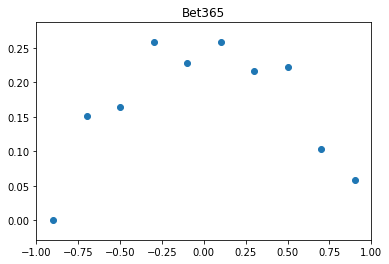

In [370]:
hist_list = []
for i in range(10):
    in_the_bin_prob = join_bet365[(join_bet365['prob_diff'] > i*0.2-1) & (join_bet365['prob_diff'] < i*0.2-0.8)]["prob_diff"].count()
    in_the_bin_real = join_bet365[(join_bet365['prob_diff'] > i*0.2-1) & (join_bet365['prob_diff'] < i*0.2-0.8) & join_bet365['is_draw'] == True]["prob_diff"].count()
    hist_list.append((in_the_bin_prob, in_the_bin_real))
probabilities = [j/(i+1) for (i,j) in hist_list]
plt.scatter([(i/5-0.9) for i in range(10)], probabilities)
plt.title('Bet365')

Generally there is an 'M'-like shape with a larger slope on home winning anticipated side(bias).  

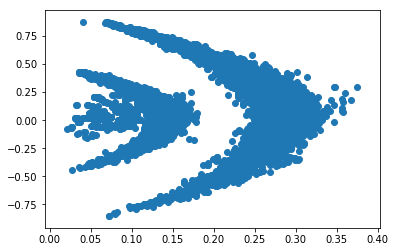

In [201]:
plt.scatter(bets_chosen_draw.new_prob, bets_chosen_difference)

Draw Probability and Home - Away Probability (x,y)